## Chapter 16: Elements of linear algebra

# C.4 Eigenvalues and Eigenvectors

Here we explain general linear functions and their relationship to matrices.  We spend considerable time discussing the special case of the square matrix, for which we describe the important topics of eigenvectors and eigenvalues.

In [1]:
# This code cell won't be shown in the HTML version of this notebook
# imports from custom library
import sys
sys.path.append('../../')
import matplotlib.pyplot as plt
from mlrefined_libraries import linear_algebra_library as linlib
import numpy as np

%load_ext autoreload
%autoreload 2

## Linear functions and rectangular matrices

Using any $P\times N$ matrix of values $\mathbf{X}$ 

$$
\mathbf{X}= \begin{bmatrix}
x_{11} & x_{12} & \cdots & x_{1N}\\
x_{21} & x_{22} & \cdots & x_{2N}\\
\vdots & \vdots & \ddots & \vdots\\
x_{P1} & x_{P2} & \cdots & x_{PN}
\end{bmatrix}
$$

defines a linear function via right matrix-vector multiplication (discussed in the previous post) with a $N\times 1$ vector of variables 

$$
\mathbf{w} =
\begin{bmatrix}
 w_1 \\
 w_2 \\
 \vdots \\
 w_N
 \end{bmatrix}
 $$
 
 as $\mathbf{X}\mathbf{w}$  Written more formally as 
 
 $$
 g(\mathbf{w}) = \mathbf{X}\mathbf{w}
 $$
 
 note that because $\mathbf{X}$ and $\mathbf{w}$ are of dimensions $P\times N$ and $N\times 1$ respectively, the output $g(\mathbf{w})$ for any input $\mathbf{w}$ is a $P\times 1$ vector itself.

Such a function is difficult to visualize for even moderate values of $P$ and $N$, but we have already seen a number of instances of this function before (and will see more below).  $g$ is called a *linear* function because it directly generalizes the concept of a line or hyperplane.  To see this notice that when $P = 1$ the matrix is reduced to a single row, and the resulting function is reduced to one sum of the form

$$
g(\mathbf{w}) = x_{11}w_1 + x_{12}w_2 + \cdots x_{1N}w_N
$$

which is just a single hyperplane in $N-1$ dimensions.  In fact, from this perspective, we can think of the general case when $P > 1$ of $g(\mathbf{w})$ consisting as the output of $P$ such hyperplanes evaluated simultaneously over the same input $\mathbf{w}$.  

$$
g(\mathbf{w}) =
\begin{bmatrix}
x_{11}w_1 + x_{12}w_2 + \cdots x_{1N}w_N \\
x_{21}w_1 + x_{22}w_2 + \cdots x_{2N}w_N \\
\vdots \\
x_{P1}w_1 + x_{P2}w_2 + \cdots x_{PN}w_N \\
\end{bmatrix}
$$

##  Linear functions and square matrices

When both dimensions of a matrix are equal, i.e., when $P=N$, the matrix $\mathbf{X}$ is called a *square matrix*.  We can visually examine the affect of such a function when $N = 2$ by viewing the way two-dimensional points are shifted due to its transformation.  

In the next Python cell we provide just such a visualization using a slider widget and the $2\times 2$ matrix whose entries were decided on at random as

$$
\mathbf{X} = 
\begin{bmatrix}
0.72603839, -1.05918159 \\
-0.19991361, -0.94740542 \\
\end{bmatrix}
$$

Remember what this means, for an input point $\mathbf{w} = \begin{bmatrix} w_0 \\ w_1 \end{bmatrix}$ the corresponding output is also length two, and takes the form

$$
g(\mathbf{w}) = 
\begin{bmatrix}
0.72603839w_0 -1.05918159w_1 \\
-0.19991361w_0  -0.94740542w_1 \\
\end{bmatrix}
$$

When the widget is initialized a coarse set of grid lines  drawn in the figure below.  The point of this visualization is to animate how each point constituting these grid lines - and thus the entire space itself - is transformed using the matrix above. 

As you move the slider to the right the transformation provided by $g(\mathbf{w})$ is gradually shown, and is completed when the slider is pushed all the way to the right.  For visualization purposes a circle of radius 2 is drawn on top of the grid and is transformed along with it.  Try moving the slider back and forth to get a feel for how the space is warped by the function $g(\mathbf{w}) = \mathbf{X}\mathbf{w}$ using the pre-chosen matrix.  If you pull the notebook associated with this post you can swap out the given matrix with any $2\times 2$ matrix of your choice.

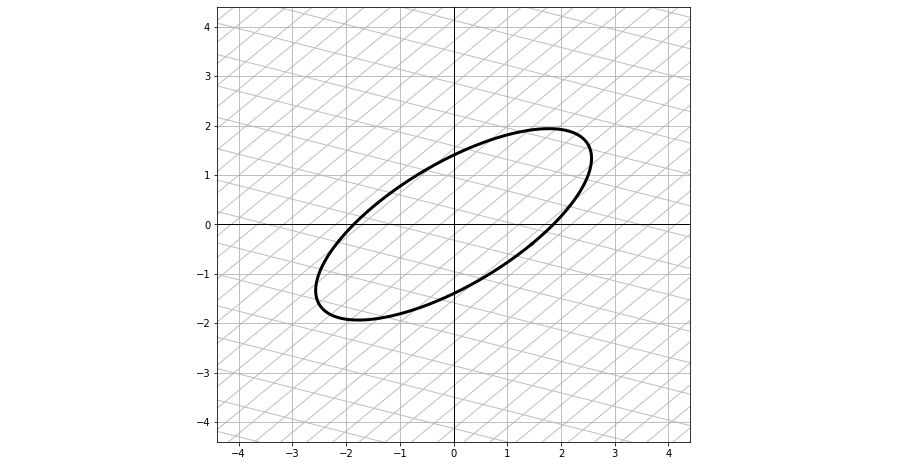

In [2]:
## This code cell will not be shown in the HTML version of this notebook
# define a random matrix and visualize its transformation
mat1 = np.array([[ 0.72603839, -1.05918159],[-0.19991361, -0.94740542]])
savepath = 'videos/animation_3.mp4'
linlib.transform_animators.transform2d_animator(savepath=savepath,mat1 = mat1,num_frames = 100,fps=20)

In [3]:
## This code cell will not be shown in the HTML version of this notebook
# load video into notebook
from IPython.display import HTML
HTML("""
<video width="1000" height="400" controls loop>
  <source src="videos/animation_3.mp4" type="video/mp4">
  </video>
""")

## Square matrices and eigenvectors / eigenvalues

The previous visualization is interesting in its own right, but if examined closely can also be used to provoke the notion of what are called *eigenvectors*.  These are the handful of directions that - unlike most others that are warped and twisted by multiplication with the given matrix - are only *scaled* by the function (that is only stretched / compressed and / or flipped).  

In the next Python cell we again show the graduate transformation provided by the random matrix above.  This time - however - we also highlight these directions as black arrows.  Now once the slider is moved slightly to the right these two directions - called eigenvectors - will be highlighted on the plane.  As you move the slider all the way to the right notice how neither direction twists or warps - they are the only two directions so unaffected, as they are only scaled - by the multiplication of $\mathbf{X}$.  

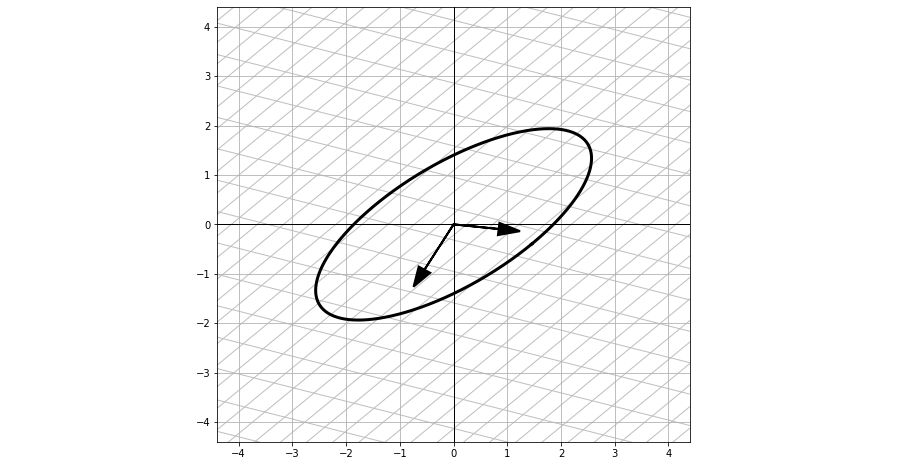

In [4]:
## This code cell will not be shown in the HTML version of this notebook
# define a random matrix and visualize its transformation
mat1 = np.array([[ 0.72603839, -1.05918159],[-0.19991361, -0.94740542]])
savepath = 'videos/animation_4.mp4'
linlib.transform_animators.transform2d_animator(savepath=savepath,mat1 = mat1,num_frames = 100,eigvecs_on = True,fps=20)

In [5]:
## This code cell will not be shown in the HTML version of this notebook
# load video into notebook
from IPython.display import HTML
HTML("""
<video width="1000" height="400" controls loop>
  <source src="videos/animation_4.mp4" type="video/mp4">
  </video>
""")

Note that this is a unique property of linear functions, most nonlinear functions do not treat any of their points so kindly.  Take for example this relatively simple looking nonlinear function

$$
g(\mathbf{w}) = 
\begin{bmatrix}
w_0 + w_1\\
w_0\text{cos}(w_0 + w_1) \\
\end{bmatrix}
$$

If we use the same visualization as with the linear function above we we can see that this nonlinear function twists and turns every point in the plane - leaving no point merely a scaled version of itself.

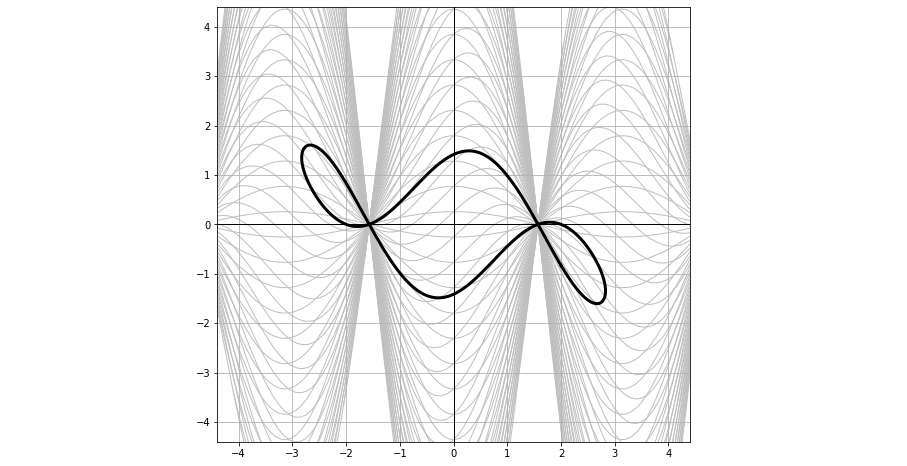

In [6]:
## This code cell will not be shown in the HTML version of this notebook
# define a random matrix and visualize its transformation
f = lambda w: np.asarray([w[0] + w[1], w[0]*np.cos(w[0] + w[1])])
savepath = 'videos/animation_5.mp4'
linlib.transform_animators.nonlinear_transform2d_animator(savepath=savepath,func = f,num_frames = 100,fps=20)

In [7]:
## This code cell will not be shown in the HTML version of this notebook
# load video into notebook
from IPython.display import HTML
HTML("""
<video width="1000" height="400" controls loop>
  <source src="videos/animation_5.mp4" type="video/mp4">
  </video>
""")

So indeed, linear functions based on an $2\times 2$ square matrix are unique in that they affect *at most* two (linearly independent) directions by merely scaling them.  This holds more generally as well: a linear function based on an $N\times N$ matrix affects at most $N$ linearly independent directions by simply scaling them.

For an $N\times N$ matrix $\mathbf{X}$ each such direction $\mathbf{v}$ (an $N\times 1$ column vector) that is merely scaled by $\mathbf{X}$ is called an *eigenvector*.  We formally write the fact that $\mathbf{X}$ merely scales $\mathbf{v}$ as

$$
\mathbf{X}\mathbf{v} = \lambda \mathbf{v}
$$

Here the value $\lambda$ is precisely the amount by which $\mathbf{X}$ scales $\mathbf{v}$, and is called an *eigenvalue*.  In practice $\lambda$ can take on real or complex values.

##  The special case of the square symmetric matrix

The specific case of a linear function generated by a square symmetric matrix, that is an $N\times N$ matrix $\mathbf{X}$ where $\mathbf{X} = \mathbf{X}^T$, is an important special case of a square matrix that arises in a wide range of contexts (we will see such matrices arise as Hessians of a cost function associated with most fundamental supervised learning models).  For example, when $N = 2$ a symmetric square matrix takes the form

$$
\mathbf{X} = 
\begin{bmatrix}
x_{11}, x_{12} \\
x_{21}, x_{22} \\
\end{bmatrix}
$$

where $x_{21} = x_{12}$.

The main advantage such matrices have over merely square ones is the following: their eigenvectors are *always* perpendicular to each other, and their eigenvalues are *always* all real numbers.

> Symmetric matrices are special because a) their eigenvectors are always perpendicular to each other, and their eigenvalues are always real numbers.

We illustrate this fact by running the same visualization as shown previously with a linear function whose matrix is the following symmetric matrix whose values are chosen at random

$$
\mathbf{X} = 
\begin{bmatrix}
1.45207678, -1.2590952  \\
-1.2590952 , -1.89481084 \\
\end{bmatrix}
$$

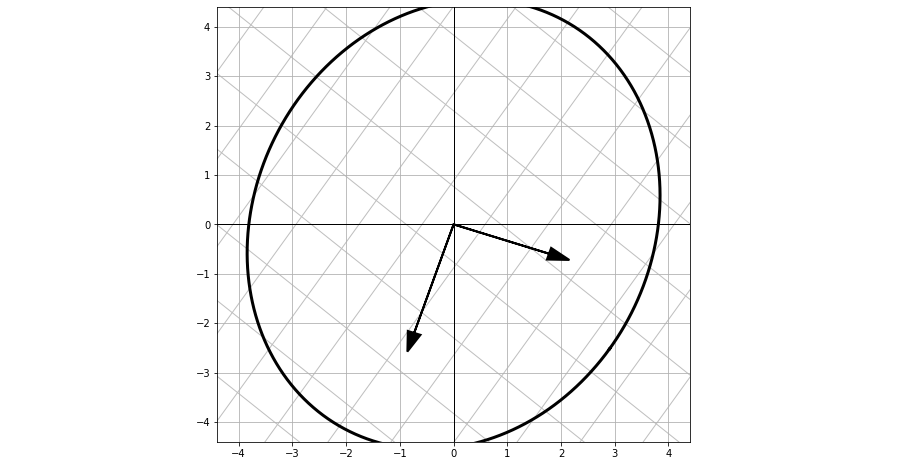

In [8]:
## This code cell will not be shown in the HTML version of this notebook
# define a random matrix and visualize its transformation
mat2 = mat1 + mat1.T
savepath = 'videos/animation_6.mp4'
linlib.transform_animators.transform2d_animator(savepath=savepath,mat1 = mat2,num_frames = 100,eigvecs_on = True,fps=20)

In [9]:
## This code cell will not be shown in the HTML version of this notebook
# load video into notebook
from IPython.display import HTML
HTML("""
<video width="1000" height="400" controls loop>
  <source src="videos/animation_6.mp4" type="video/mp4">
  </video>
""")

The eigenvectors here are certainly perpendicular, and this fact holds in general for arbitrary symmetric $N\times N$ matrix $\mathbf{X}$.  This fact has significant repercussions in the analysis of such matrices, because given the equation for one eigenvector $\mathbf{v}$

$$
\mathbf{X}\mathbf{v} = \lambda \mathbf{v}
$$

we can *diagonalize* a symmetric matrix by concatenating its entire set of eigenvectors into a matrix, and its eigenvalues into a diagonal matrix.

Stacking all of the eigenvectors of $\mathbf{X}$ columnwise into a matrix $\mathbf{V}$, and placing the corresponding eigenvalues along the diagonal of a matrix $\mathbf{D}$, we can write the equation above simultaneously for all eigenvectors as 

$$
\mathbf{X}\mathbf{V} = \mathbf{V} \mathbf{D}
$$

and because the eigenvectors are perpendicular $\mathbf{V}$ is an orthonormal matrix, i.e., $\mathbf{V}\mathbf{V}^T = \mathbf{I}$.  Thus left multiplying both sides by $\mathbf{V}^T$ we can express $\mathbf{X}$ completely in terms of its eigenvectors/values as 

$$
\mathbf{X} = \mathbf{V} \mathbf{D} \mathbf{V}^T
$$

Again this expression is referred to as the *diagonalization* of the matrix $\mathbf{X}$.  This is often referred to as the *Spectral Theorem of Symmetric Matrices*.